In [45]:
def escaleta():
    '''
    1. #Importar Librerías
    2. #explorar la web de INE y descargar csv migration_spain
    3. #Verificacion nulos y tamaños
    4. #Encabezados separar comunidades de códigos
    5. #Convertir a valores absolutos, habían datos con signo negativo
    6. #Encabezados separar año de semestre   
    7. #Tabla agrupada por comunidades autónomas y año
    8. #seleccionar los dos últimos años
    9. #agrupar y ordenar
    10. #Análsis gráfico por CCAA
    11. #seleccionar y sumar los dos últimos años
    12. #Elegimos a la CCAA de Madrid
    13 #Web Scrapping datos.gob.es
    14. #Request, conctada
    15. #print(data) 
    16. #Importando beautiful Soup
    17. #encontramos links que tengan coincidencias con el contenido de "csv"
    18. #Descargamos el link del año 2022 para obtener datos
    19. #Análisis exploratorio
    20. #Elimino las 291 últimas filas porque estabana en Blanco, "nan"
    21. #Top 5 nacionalidades
    22. #histograma general
    23. #Tabla cruzada de situación administrativa y género
    24. #api ayuntamiento de madrid madrid
    25. #Se conecta, más no envía los datos
    26. #Descargamos ese estudio de la caaa de Madrid en CSV
    27. 
    
    
    

       
    '''
    return None

help(escaleta)

Help on function escaleta in module __main__:

escaleta()
    1. #Importar Librerías
    2. #explorar csv migration_spain
    3. #Verificacion nulos y tamaños
    4. #Encabezados separar comunidades de códigos
    5. #Convertir a valores absolutos, habían datos con signo negativo
    6. #Encabezados separar año de semestre
    
    
    7. #Tabla agrupada por comunidades autónomas
    8. #CCAA ortenadas de mayor a menor
    8. #Análsis gráfico por CCAA
    9. #Web Scrapping datos.gob.es
    10. #Request, conctada
    11. #print(data) 
    12. #Importando beautiful Soup
    13. #encontramos links que tengan coincidencias con el contenido de "csv"
    14. #Descargamos el link del año 2022 para obtener datos
    15. 
    16. 
    17.



In [46]:
#Importar Librerías
#%pip install ipython
#%pip install pandas
#%pip install seaborn
#%matplotlib inline

In [47]:
import pandas as pd
import numpy as np
import pylab as plt   
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')   # para quitar esos prints

In [48]:
#explorar la web de INE y descargar csv
migration = pd.read_csv('./data/migration_spain.csv', sep=';', error_bad_lines=False, encoding='utf-8')
migration.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total
0,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2022S1,1433
1,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S2,968
2,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S1,634
3,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S2,721
4,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S1,754


In [49]:
#Verificacion nulos y tamaños
migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20938 entries, 0 to 20937
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Comunidades y ciudades autónomas  20938 non-null  object
 1   Sexo                              20938 non-null  object
 2   País de nacimiento                20938 non-null  object
 3   Grupo quinquenal de edad          20938 non-null  object
 4   Periodo                           20938 non-null  object
 5   Total                             20938 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 981.6+ KB


In [50]:
nan_cols = migration.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [51]:
#Encabezados, separar comunidades de códigos
df_mig= migration[['Codigo', 'Comunidades']] = migration['Comunidades y ciudades autónomas'].str.split(' ', 1, expand=True)
migration.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total,Codigo,Comunidades
0,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2022S1,1433,01,Andalucía
1,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S2,968,01,Andalucía
2,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S1,634,01,Andalucía
3,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S2,721,01,Andalucía
4,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S1,754,01,Andalucía


In [52]:
#Convertir a valores absolutos, habían datos con signo negativo
migration['Total'] = abs(migration['Total'])

In [53]:
#Encabezados, separar año de semestre
df_mig= migration[['año', 'semestre']] = migration['Periodo'].str.split('S', 1, expand=True)
migration.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total,Codigo,Comunidades,año,semestre
0,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2022S1,1433,01,Andalucía,2022,1
1,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S2,968,01,Andalucía,2021,2
2,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S1,634,01,Andalucía,2021,1
3,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S2,721,01,Andalucía,2020,2
4,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S1,754,01,Andalucía,2020,1


In [111]:
#Tabla agrupada por comunidades autónomas y año
pivot_ccaa = pd.pivot_table(migration, values='Total', index='Comunidades', columns='año', aggfunc='sum')
pivot_ccaa

año,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Comunidades,,,,,,,,,,,,,,,
Andalucía,49804,22374,19893,20764,16563,17231,12615,13088,16642,26112,38488,58746,39841,33913,34252
Aragón,14960,5816,5184,4934,4836,5426,3670,4612,4020,6059,10864,13119,6729,19610,6156
"Asturias, Principado de",6112,3003,2453,2388,1735,2118,1936,1429,1945,2028,2849,5012,2860,1698,3954
"Balears, Illes",14648,5763,3620,4508,3899,4700,4171,5547,8293,12118,16166,19908,10986,7746,9774
Canarias,23505,12247,11432,12500,12998,6968,8746,10385,18007,21839,30491,32373,14067,13894,13615
Cantabria,4432,2066,1325,1217,1555,1417,864,1008,1346,1729,2776,3228,2111,1936,2909
Castilla - La Mancha,13336,6284,6093,5229,6459,9792,4689,4553,4295,7241,9939,14883,7608,7440,11304
Castilla y León,12625,6111,5001,4751,4427,5215,3201,3831,3997,6724,8943,12096,6299,7939,9659
Cataluña,66313,43633,46727,44765,47143,67661,38666,29390,40567,60552,91194,98145,53570,47150,48621


In [131]:
#seleccionar los dos últimos años
ccaa_2022= pivot_ccaa.iloc[:, [13, -1]]
ccaa_2022


año,2021,2022
Comunidades,,
Andalucía,33913,34252
Aragón,19610,6156
"Asturias, Principado de",1698,3954
"Balears, Illes",7746,9774
Canarias,13894,13615
Cantabria,1936,2909
Castilla - La Mancha,7440,11304
Castilla y León,7939,9659
Cataluña,47150,48621


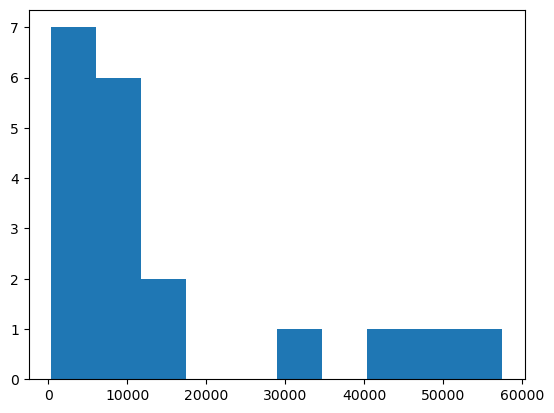

In [125]:
#Análsis gráfico por CCAA

plt.hist(ccaa_2022['2022'])
plt.show()



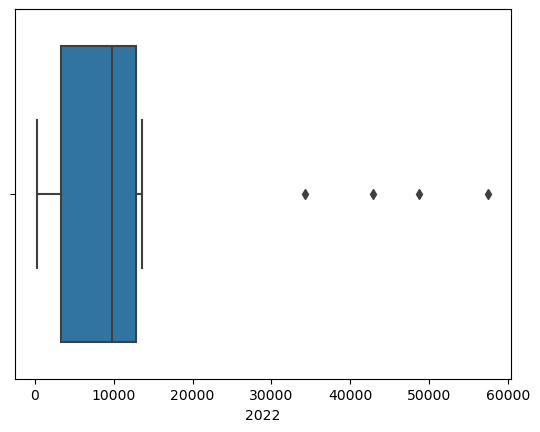

In [127]:
sns.boxplot(x=ccaa_2022['2022'])
plt.show()

In [164]:
#sumar columnas de dos años, casi 541919 personas migrantes
ccaa_2022['Total'] = ccaa_2022['2021'] + ccaa_2022['2022']
ccaa_2022

año,2021,2022,Total
Comunidades,,,
Andalucía,33913,34252,68165
Aragón,19610,6156,25766
"Asturias, Principado de",1698,3954,5652
"Balears, Illes",7746,9774,17520
Canarias,13894,13615,27509
Cantabria,1936,2909,4845
Castilla - La Mancha,7440,11304,18744
Castilla y León,7939,9659,17598
Cataluña,47150,48621,95771


In [180]:
#Elegimos a la CCAA de Madrid
df_reset = ccaa_2022.reset_index()
df_madrid = df_reset[df_reset['Comunidades'] == "Madrid, Comunidad de"]
df_madrid

año,Comunidades,2021,2022,Total
13,"Madrid, Comunidad de",44249,57461,101710


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [59]:
#Web Scrapping datos.gob.es

#%pip install requests
import requests as req   
import json


In [60]:
url='https://datos.gob.es/es/catalogo/l01280796-inmigrantes-personas-atendidas-en-el-servicio-de-informacion-y-orientacion'

In [61]:
#Request, conctada
res = req.get(url)
res

<Response [200]>

In [62]:
data = res.text
#print(data)

In [63]:
#Importando beautiful Soup
import requests
from bs4 import BeautifulSoup


In [64]:
soup = BeautifulSoup(data, "html.parser")

In [65]:
#encontramos links que tengan coincidencias con el contenido de "csv"
links = soup.find_all('a')
csv_links = [link.get('href')
              for link in links if link.get('href') and '.csv' in link.get('href')]

In [66]:
csv_links

['https://datos.gob.es/es/catalogo/l01280796-inmigrantes-personas-atendidas-en-el-servicio-de-informacion-y-orientacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-5-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-7-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-9-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-10-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-12-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-14-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-16-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-18-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-20-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-22-inmigrantes-informacion.csv']

In [67]:
url_inm = 'https://datos.madrid.es/egob/catalogo/211388-22-inmigrantes-informacion.csv'
df2022 = pd.read_csv(url_inm, sep=';',encoding='ISO-8859-1')

In [145]:
#Descargamos el link del año 2022 para obtener datos
df2022.head()


,Año,Mes,Sexo,Edad,Nacionalidad - País,Áreas geográficas,Nivel de estudios,Información gral,Sist. Jco Adttvo 1,Sist. Jco Adttvo 2,Sist. Jco Adttvo 3,Sist. Jco Adttvo 4,Sist. Salud,Sist. Empleo,Sist. Servicios Sociales,Sist. Educación,Sist. Vivienda,Situación Administrativa,Oficina
0,2022.0,Enero,Mujer,31 a 50 años,colombia,América Latina,Secundaria,NaN,tasas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irregular,Oficina Norte
1,2022.0,Enero,Mujer,31 a 50 años,honduras,América Latina,Secundaria,NaN,Arraigo Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irregular,Oficina Norte
2,2022.0,Enero,Hombre,31 a 50 años,perú,América Latina,Secundaria,NaN,Arraigo Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irregular,Oficina Norte
3,2022.0,Enero,Mujer,31 a 50 años,colombia,América Latina,Secundaria,NaN,Arraigo Social,NaN,NaN,NaN,NaN,Habilidades y técnicas BAE,NaN,NaN,NaN,Turista,Oficina Norte
4,2022.0,Enero,Mujer,31 a 50 años,honduras,América Latina,Secundaria,NaN,Cita Brigada Provincial Extranjería,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ART,Oficina Norte


In [142]:
#Análisis exploratorio
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24036 entries, 0 to 24035
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       23745 non-null  float64
 1   Mes                       23745 non-null  object 
 2   Sexo                      23746 non-null  object 
 3   Edad                      23746 non-null  object 
 4   Nacionalidad - País       23743 non-null  object 
 5   Áreas geográficas         23746 non-null  object 
 6   Nivel de estudios         23746 non-null  object 
 7   Información gral          1849 non-null   object 
 8   Sist. Jco Adttvo 1        20833 non-null  object 
 9   Sist. Jco Adttvo 2        3340 non-null   object 
 10  Sist. Jco Adttvo 3        478 non-null    object 
 11  Sist. Jco Adttvo 4        69 non-null     object 
 12  Sist. Salud               534 non-null    object 
 13  Sist. Empleo              1320 non-null   object 
 14  Sist. 

In [146]:
nan_cols = df2022.isna().sum()

nan_cols[nan_cols>0]

Año                           291
Mes                           291
Sexo                          290
Edad                          290
Nacionalidad - País           293
Áreas geográficas             290
Nivel de estudios             290
Información gral            22187
Sist. Jco Adttvo 1           3203
Sist. Jco Adttvo 2          20696
Sist. Jco Adttvo 3          23558
Sist. Jco Adttvo 4          23967
Sist. Salud                 23502
Sist. Empleo                22716
Sist. Servicios Sociales    23514
Sist. Educación             23188
Sist. Vivienda              23946
Situación Administrativa      290
Oficina                       291
dtype: int64

In [147]:
#Elimino las 291 últimas filas porque estabana en Blanco, "nan"
df2022.drop(df.index[-291:], inplace=True)

In [150]:
top_nacionalidades = df2022['Nacionalidad - País'].value_counts().head(5)
print(top_nacionalidades)

Perú         4515
Colombia     3172
Honduras     1967
Venezuela    1771
Ecuador      1768
Name: Nacionalidad - País, dtype: int64


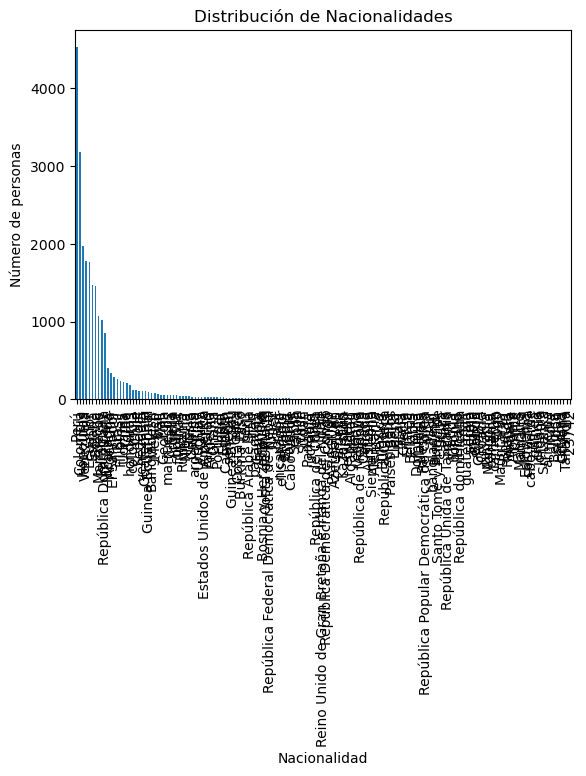

In [153]:
#histograma general
df2022['Nacionalidad - País'].value_counts().plot(kind='bar')
plt.title('Distribución de Nacionalidades')
plt.xlabel('Nacionalidad')
plt.ylabel('Número de personas')
plt.show()

In [161]:
#Tabla cruzada de situación administrativa y género

Cross= pd.crosstab(df2022['Situación Administrativa'], df2022['Sexo'])
Cross

Sexo,23745,Hombre,Mujer,mujer
Situación Administrativa,,,,
23745,1,0,0,0
A R,0,106,261,0
ART,0,2331,6676,0
Asilo / Refugio,0,438,723,0
Comunitario,0,939,2548,0
Estudiante,0,212,411,1
Familiar Comunitario,0,377,923,0
Irregular,0,2041,4402,0
Persona desde el extranjero,0,21,51,0


In [72]:
#api ayuntamiento de madrid madrid

In [135]:
url_mad=('https://datos.madrid.es/egob/catalogo/title/Estructura%20de%20la%20poblaci%C3%B3n%20por%20nacionalidad..json')

In [136]:
res_mad = req.get(url_mad)
res_mad

<Response [200]>

In [137]:
res_mad.json()

{'format': 'linked-data-api',
 'version': '0.2',
 'result': {'first': 'https://datos.madrid.es/egob/catalogo/title/Estructura de la población por nacionalidad..json?_page=0',
  'items': [],
  'itemsPerPage': 50,
  'page': 0,
  'startIndex': 1,
  'total': 0,
  'type': ['http://purl.org/linked-data/api/vocab#ListEndpoint',
   'http://purl.org/linked-data/api/vocab#Page']}}

In [77]:
#Se conecta, más no envía los datos
df_mad=pd.DataFrame(res_mad)
df_mad

,0
0,"b'{ ""format"" : ""linked-data-api"", ""version"" : ..."
1,b' de la poblaci\xc3\xb3n por nacionalidad..js...
2,"b' ""type"" : [""http://purl.org/linked-data/api..."


In [190]:
#Descargamos ese estudio de la caaa de Madrid en CSV
barrios = pd.read_csv('../data/panel_indicadores_distritos_barrios.csv', sep=',', error_bad_lines=False, encoding='latin-1))
barrios

SyntaxError: EOL while scanning string literal (2666311520.py, line 2)